## Avaliação de Transações de NFT's Comuns com modelos treinados a partir de NFT's Blue Chips (dados coletados em Março/2023)

## Packages and libraries

In [1]:
pip install google-cloud-bigquery db-dtypes pandas tensorflow scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# importar pacotes
import os
import requests
import numpy as np
import glob
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

from tensorflow import keras
from tensorflow.keras import layers, models

## Conjunto de Dados - Data Sets (NFT's Blue Chip's e NFT's Comuns)

Arquivos CSV criados a partir da extração de dados no Google BigQuery contém as seguintes informações:

* BLOCK_TIMESTAMP: timestamp do bloco em que a transferência foi registrada.
* FROM_ADDRESS: endereço da carteira que enviou os tokens.
* TO_ADDRESS: endereço da carteira que recebeu os tokens.
* VALUE: valor da transferência em wei, a menor unidade de ether (a criptomoeda da Ethereum).
* TRANSACTION_HASH: hash da transação na blockchain Ethereum.
* NONCE: número de sequência da transação na carteira que a criou.
* FROM_ADDRESS_BLOCKCHAIN: endereço da carteira que enviou a transação na blockchain Ethereum.
* TO_ADDRESS_BLOCKCHAIN: endereço da carteira que recebeu a transação na blockchain Ethereum.
* GAS: quantidade de gas (unidade de custo de processamento na Ethereum) usada pela transação.
* RECEIPT_GAS_USED: quantidade de gas usada para executar a transferência de tokens.

In [3]:
def lista_df():
  # Lista vazia para armazenar os dataframes
  df_list = []

  # Localizar todos os arquivos CSV no diretório atual
  for filename in glob.glob("Z:/Python/Data/Blue_Chips/*.csv"):
      # Ler o arquivo CSV em um dataframe
      df = pd.read_csv(filename)
      # Adicionar o dataframe à lista
      df_list.append(df)

  return df_list

In [4]:
def lista_comum_df():
  # lista vazia para armazenar os dataframes
  df_comum_list = []

  # Localizar todos os arquivos CSV no diretório atual
  for filename in glob.glob("Z:/Python/Data/Comuns/Teste3/*.csv"):

      # Ler o arquivo CSV em um dataframe
      df = pd.read_csv(filename)
      # Adicionar o dataframe à lista
      df_comum_list.append(df)

  return df_comum_list

In [5]:
def process_dataframe(df):
    # Convertendo a coluna 'BLOCK_TIMESTAMP' e 'BLOCK_TIMESTAMP_BLUE' para o tipo datetime
    df['BLOCK_TIMESTAMP'] = pd.to_datetime(df['BLOCK_TIMESTAMP'])

    # Criando uma nova coluna com a data (sem o horário) dos blocos
    df['BLOCK_DATE'] = df['BLOCK_TIMESTAMP'].dt.date

    # Convertendo a coluna 'BLOCK_DATE' para o tipo datetime
    df['BLOCK_DATE'] = pd.to_datetime(df['BLOCK_DATE'])

In [6]:
list_df_blue = []
list_df_blue = lista_df()
len(list_df_blue)

20

In [7]:
list_df_comum = []
list_df_comum = lista_comum_df()
len(list_df_comum)

23

In [8]:
# Loop para iterar sobre as list_df_blue, list_df_comum
for idx, df_group in enumerate([list_df_blue, list_df_comum]):
    if idx == 0:
        group_label = "Blue Chip"
    else:
        group_label = "Comum"

    for i, df_aux in enumerate(df_group):
        print(f"\nData Frame {group_label} {i+1}")
        print("Informações:")
        df_aux.info()
        print("\n5 primeiros registros:")
        print(df_aux.head())



Data Frame Blue Chip 1
Informações:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98206 entries, 0 to 98205
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ADDRESS_BLUE             98206 non-null  object
 1   BLOCK_TIMESTAMP_BLUE     98206 non-null  object
 2   BLOCK_TIMESTAMP          98206 non-null  object
 3   FROM_ADDRESS             98206 non-null  object
 4   TO_ADDRESS               98206 non-null  object
 5   VALUE                    98206 non-null  int64 
 6   TRANSACTION_HASH         98206 non-null  object
 7   NONCE                    98206 non-null  int64 
 8   FROM_ADDRESS_BLOCKCHAIN  98206 non-null  object
 9   TO_ADDRESS_BLOCKCHAIN    98206 non-null  object
 10  GAS                      98206 non-null  int64 
 11  RECEIPT_GAS_USED         98206 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 9.0+ MB

5 primeiros registros:
                                 ADDRE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93723 entries, 0 to 93722
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ADDRESS_BLUE             93723 non-null  object
 1   BLOCK_TIMESTAMP_BLUE     93723 non-null  object
 2   BLOCK_TIMESTAMP          93723 non-null  object
 3   FROM_ADDRESS             93723 non-null  object
 4   TO_ADDRESS               93723 non-null  object
 5   VALUE                    93723 non-null  int64 
 6   TRANSACTION_HASH         93723 non-null  object
 7   NONCE                    93723 non-null  int64 
 8   FROM_ADDRESS_BLOCKCHAIN  93723 non-null  object
 9   TO_ADDRESS_BLOCKCHAIN    93723 non-null  object
 10  GAS                      93723 non-null  int64 
 11  RECEIPT_GAS_USED         93723 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 8.6+ MB

5 primeiros registros:
                                 ADDRESS_BLUE     BLOCK_TIMESTAMP_BLUE  \
0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104393 entries, 0 to 104392
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ADDRESS_BLUE             104393 non-null  object
 1   BLOCK_TIMESTAMP_BLUE     104393 non-null  object
 2   BLOCK_TIMESTAMP          104393 non-null  object
 3   FROM_ADDRESS             104393 non-null  object
 4   TO_ADDRESS               104393 non-null  object
 5   VALUE                    104393 non-null  int64 
 6   TRANSACTION_HASH         104393 non-null  object
 7   NONCE                    104393 non-null  int64 
 8   FROM_ADDRESS_BLOCKCHAIN  104393 non-null  object
 9   TO_ADDRESS_BLOCKCHAIN    104393 non-null  object
 10  GAS                      104393 non-null  int64 
 11  RECEIPT_GAS_USED         104393 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 9.6+ MB

5 primeiros registros:
                                 ADDRESS_BLUE     BLOCK_TIM

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210339 entries, 0 to 210338
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ADDRESS_BLUE             210339 non-null  object
 1   BLOCK_TIMESTAMP_BLUE     210339 non-null  object
 2   BLOCK_TIMESTAMP          210339 non-null  object
 3   FROM_ADDRESS             210339 non-null  object
 4   TO_ADDRESS               210339 non-null  object
 5   VALUE                    210339 non-null  int64 
 6   TRANSACTION_HASH         210339 non-null  object
 7   NONCE                    210339 non-null  int64 
 8   FROM_ADDRESS_BLOCKCHAIN  210339 non-null  object
 9   TO_ADDRESS_BLOCKCHAIN    210339 non-null  object
 10  GAS                      210339 non-null  int64 
 11  RECEIPT_GAS_USED         210339 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 19.3+ MB

5 primeiros registros:
                                 ADDRESS_BLUE     BLOCK_TI

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178767 entries, 0 to 178766
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ADDRESS_BLUE             178767 non-null  object
 1   BLOCK_TIMESTAMP_BLUE     178767 non-null  object
 2   BLOCK_TIMESTAMP          178767 non-null  object
 3   FROM_ADDRESS             178767 non-null  object
 4   TO_ADDRESS               178767 non-null  object
 5   VALUE                    178767 non-null  int64 
 6   TRANSACTION_HASH         178767 non-null  object
 7   NONCE                    178767 non-null  int64 
 8   FROM_ADDRESS_BLOCKCHAIN  178767 non-null  object
 9   TO_ADDRESS_BLOCKCHAIN    178755 non-null  object
 10  GAS                      178767 non-null  int64 
 11  RECEIPT_GAS_USED         178767 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 16.4+ MB

5 primeiros registros:
                                 ADDRESS_BLUE     BLOCK_TI

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4214 entries, 0 to 4213
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   BLOCK_TIMESTAMP          4214 non-null   object
 1   FROM_ADDRESS             4214 non-null   object
 2   TO_ADDRESS               4214 non-null   object
 3   VALUE                    4214 non-null   int64 
 4   TRANSACTION_HASH         4214 non-null   object
 5   NONCE                    4214 non-null   int64 
 6   FROM_ADDRESS_BLOCKCHAIN  4214 non-null   object
 7   TO_ADDRESS_BLOCKCHAIN    4214 non-null   object
 8   GAS                      4214 non-null   int64 
 9   RECEIPT_GAS_USED         4214 non-null   int64 
 10  ADDRESS_COMUM            4214 non-null   object
dtypes: int64(4), object(7)
memory usage: 362.3+ KB

5 primeiros registros:
                  BLOCK_TIMESTAMP                                FROM_ADDRESS  \
0  2023-03-08 11:29:23.000000 UTC  0x0000000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36174 entries, 0 to 36173
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   BLOCK_TIMESTAMP          36174 non-null  object
 1   FROM_ADDRESS             36174 non-null  object
 2   TO_ADDRESS               36174 non-null  object
 3   VALUE                    36174 non-null  int64 
 4   TRANSACTION_HASH         36174 non-null  object
 5   NONCE                    36174 non-null  int64 
 6   FROM_ADDRESS_BLOCKCHAIN  36174 non-null  object
 7   TO_ADDRESS_BLOCKCHAIN    36174 non-null  object
 8   GAS                      36174 non-null  int64 
 9   RECEIPT_GAS_USED         36174 non-null  int64 
 10  ADDRESS_COMUM            36174 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.0+ MB

5 primeiros registros:
           BLOCK_TIMESTAMP                                FROM_ADDRESS  \
0  2023-03-04 12:36:47 UTC  0x000000000000000000000000

In [9]:
# Processando a lista de DataFrames list_df_blue
df_list_blue = []
for df_blue in list_df_blue:
    process_dataframe(df_blue)
    df_list_blue.append(df_blue)

# Processando a lista de DataFrames list_df_comum
df_list_comum = []
for df_comum in list_df_comum:
    process_dataframe(df_comum)
    df_list_comum.append(df_comum)


In [10]:
list_grouped_df_blue = []
list_grouped_df_comum = []

# Loop para agrupar os DataFrames e criar as listas list_grouped_df_blue e list_grouped_df_comum
for dataframe_list, grouped_list in zip([df_list_blue, df_list_comum], [list_grouped_df_blue, list_grouped_df_comum]):
    for df in dataframe_list:
        grouped_df = df.groupby('BLOCK_DATE')
        grouped_list.append(grouped_df)

# Loop para imprimir os tamanhos dos grupos para ambos os DataFrames agrupados
for label, grouped_list in [("Blue Chip", list_grouped_df_blue), ("Comum", list_grouped_df_comum)]:
    print(f"\n{label} DataFrames:")
    
    for i, grouped_df in enumerate(grouped_list):
        print(f"\ngrouped_df_{label} {i+1}")
        
        # Use a função size() para obter o tamanho de cada grupo
        group_sizes = grouped_df.size()
        
        # Imprima os tamanhos dos grupos
        print(group_sizes)



Blue Chip DataFrames:

grouped_df_Blue Chip 1
BLOCK_DATE
2022-01-06    8231
2022-01-07    2905
2022-01-08    1250
2022-01-09     618
2022-01-10     315
              ... 
2023-03-10     102
2023-03-11      36
2023-03-12     150
2023-03-13      64
2023-03-14       5
Length: 433, dtype: int64

grouped_df_Blue Chip 2
BLOCK_DATE
2022-04-29     15000
2022-04-30        81
2022-05-01    131388
2022-05-02     16965
2022-05-03      6447
               ...  
2023-03-10      1182
2023-03-11      1057
2023-03-12       723
2023-03-13       857
2023-03-14        48
Length: 320, dtype: int64

grouped_df_Blue Chip 3
BLOCK_DATE
2021-07-22    9654
2021-07-23     515
2021-07-24     232
2021-07-25     256
2021-07-26     166
              ... 
2023-03-10     206
2023-03-11     152
2023-03-12     101
2023-03-13     174
2023-03-14      22
Length: 601, dtype: int64

grouped_df_Blue Chip 4
BLOCK_DATE
2022-10-31    3734
2022-11-01     165
2022-11-02      94
2022-11-03     110
2022-11-04      20
              .

In [11]:
ts_nft_comum = []  # Lista para armazenar os DataFrames criados a partir de list_grouped_df_comum
ts_nft_blue = []   # Lista para armazenar os DataFrames criados a partir de list_grouped_df_blue

# Loop para iterar sobre list_grouped_df_comum e list_grouped_df_blue
for label, grouped_list, ts_nft_list in [("Comum", list_grouped_df_comum, ts_nft_comum), ("Blue Chip", list_grouped_df_blue, ts_nft_blue)]:
    print(f"\n{label} DataFrames:")
    
    for i, ts in enumerate(grouped_list):
        print(f"\ngrouped_df_{label} {i+1}")
        
        # Criar um novo DataFrame vazio para cada grupo
        df = pd.DataFrame()
        
        # Adicionar a coluna 'BLOCK_DATE' ao DataFrame
        df['BLOCK_DATE'] = ts['BLOCK_DATE'].mean()
        
        # Número de transações diárias
        df['QTDE_TRANSACOES_DIA'] = ts['BLOCK_DATE'].count()
        
        # Média de GAS diário
        df['MEDIA_GAS_DIA'] = ts['GAS'].mean()
        
        # Média de GAS_LIMIT diário
        df['MEDIA_GAS_LIMIT_DIA'] = ts['RECEIPT_GAS_USED'].mean()
        
        # Quantidade de compradores únicos diários
        df['QTDE_COMPRADORES_UNICOS_DIA'] = ts['FROM_ADDRESS'].nunique()
        
        # Quantidade de vendedores únicos diários
        df['QTDE_VENDEDORES_UNICOS_DIA'] = ts['TO_ADDRESS'].nunique()
        
        # Cálculo de NEW_HOLDER
        df['NEW_HOLDER'] = (ts['FROM_ADDRESS'].nunique() + ts['TO_ADDRESS'].nunique()) / ts['BLOCK_DATE'].count()
        
        # Transforma a coluna 'BLOCK_DATE' em índice temporal
        df.set_index('BLOCK_DATE', inplace=True)
        
        # Adicionar o DataFrame criado à lista correspondente
        ts_nft_list.append(df)



Comum DataFrames:

grouped_df_Comum 1

grouped_df_Comum 2

grouped_df_Comum 3

grouped_df_Comum 4

grouped_df_Comum 5

grouped_df_Comum 6

grouped_df_Comum 7

grouped_df_Comum 8

grouped_df_Comum 9

grouped_df_Comum 10

grouped_df_Comum 11

grouped_df_Comum 12

grouped_df_Comum 13

grouped_df_Comum 14

grouped_df_Comum 15

grouped_df_Comum 16

grouped_df_Comum 17

grouped_df_Comum 18

grouped_df_Comum 19

grouped_df_Comum 20

grouped_df_Comum 21

grouped_df_Comum 22

grouped_df_Comum 23

Blue Chip DataFrames:

grouped_df_Blue Chip 1

grouped_df_Blue Chip 2

grouped_df_Blue Chip 3

grouped_df_Blue Chip 4

grouped_df_Blue Chip 5

grouped_df_Blue Chip 6

grouped_df_Blue Chip 7

grouped_df_Blue Chip 8

grouped_df_Blue Chip 9

grouped_df_Blue Chip 10

grouped_df_Blue Chip 11

grouped_df_Blue Chip 12

grouped_df_Blue Chip 13

grouped_df_Blue Chip 14

grouped_df_Blue Chip 15

grouped_df_Blue Chip 16

grouped_df_Blue Chip 17

grouped_df_Blue Chip 18

grouped_df_Blue Chip 19

grouped_df_Blue C

In [12]:
# Verifique os 5 primeiros registros de ts_nft_comum
print("5 primeiros registros de ts_nft_comum:")
for i, df in enumerate(ts_nft_comum):
    print(f"\nDataFrame {i+1} (ts_nft_comum):")
    print(df.head(5))

# Verifique os 5 primeiros registros de ts_nft_blue
print("\n5 primeiros registros de ts_nft_blue:")
for i, df in enumerate(ts_nft_blue):
    print(f"\nDataFrame {i+1} (ts_nft_blue):")
    print(df.head(5))


5 primeiros registros de ts_nft_comum:

DataFrame 1 (ts_nft_comum):
            QTDE_TRANSACOES_DIA  MEDIA_GAS_DIA  MEDIA_GAS_LIMIT_DIA  \
BLOCK_DATE                                                            
2023-03-17                  300   4.452330e+05         3.245630e+05   
2023-03-21                 3631   9.808236e+05         6.840149e+05   
2023-03-22                12365   7.873550e+05         5.976361e+05   
2023-03-23                 1809   2.475387e+06         1.870760e+06   
2023-03-24                  564   2.275949e+06         1.741566e+06   

            QTDE_COMPRADORES_UNICOS_DIA  QTDE_VENDEDORES_UNICOS_DIA  \
BLOCK_DATE                                                            
2023-03-17                            1                           3   
2023-03-21                           40                         394   
2023-03-22                         1001                        1912   
2023-03-23                          431                         456   
2023-03-

In [13]:
# Função para normalizar uma lista de DataFrames
def normalize_dataframes(dataframe_list):
    # Inicialize o MinMaxScaler
    scaler = MinMaxScaler()

    for idx, ts in enumerate(dataframe_list):
        # Selecione apenas as colunas numéricas para normalização
        columns_to_normalize = [
            'QTDE_TRANSACOES_DIA',
            'MEDIA_GAS_DIA',
            'MEDIA_GAS_LIMIT_DIA',
            'QTDE_COMPRADORES_UNICOS_DIA',
            'QTDE_VENDEDORES_UNICOS_DIA',
            'NEW_HOLDER'
        ]

        # Aplique o Min-Max Scaling às colunas selecionadas
        dataframe_list[idx][columns_to_normalize] = scaler.fit_transform(ts[columns_to_normalize])




In [14]:
# Normalizar ts_nft_comum
normalize_dataframes(ts_nft_comum)

# Normalizar ts_nft_blue
normalize_dataframes(ts_nft_blue)

In [15]:
# Função para imprimir informações e os 5 primeiros registros de uma lista de DataFrames
def print_info_and_head(dataframe_list):
    for i, df in enumerate(dataframe_list):
        print(f"\nDataFrame {i+1}:")
        print("Informações após a normalização:")
        print(df.info())
        print("5 primeiros registros após a normalização:")
        print(df.head())

# Imprimir informações e os 5 primeiros registros de ts_nft_blue após a normalização
print("Informações e 5 primeiros registros de ts_nft_blue após a normalização:")
print_info_and_head(ts_nft_blue)

print("\n=======================================================================================\n")


# Imprimir informações e os 5 primeiros registros de ts_nft_comum após a normalização
print("Informações e 5 primeiros registros de ts_nft_comum após a normalização:")
print_info_and_head(ts_nft_comum)



Informações e 5 primeiros registros de ts_nft_blue após a normalização:

DataFrame 1:
Informações após a normalização:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 433 entries, 2022-01-06 00:00:00 to 2023-03-14 00:00:00
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   QTDE_TRANSACOES_DIA          433 non-null    float64
 1   MEDIA_GAS_DIA                433 non-null    float64
 2   MEDIA_GAS_LIMIT_DIA          433 non-null    float64
 3   QTDE_COMPRADORES_UNICOS_DIA  433 non-null    float64
 4   QTDE_VENDEDORES_UNICOS_DIA   433 non-null    float64
 5   NEW_HOLDER                   433 non-null    float64
dtypes: float64(6)
memory usage: 23.7 KB
None
5 primeiros registros após a normalização:
            QTDE_TRANSACOES_DIA  MEDIA_GAS_DIA  MEDIA_GAS_LIMIT_DIA  \
BLOCK_DATE                                                            
2022-01-06             0.733482       0.06603

            QTDE_TRANSACOES_DIA  MEDIA_GAS_DIA  MEDIA_GAS_LIMIT_DIA  \
BLOCK_DATE                                                            
2023-03-27             0.004721       0.000000             0.000000   
2023-03-28             0.059009       0.159422             0.109309   
2023-03-29             0.177026       1.000000             1.000000   
2023-03-30             1.000000       0.463751             0.329745   
2023-03-31             0.000000       0.236779             0.182783   

            QTDE_COMPRADORES_UNICOS_DIA  QTDE_VENDEDORES_UNICOS_DIA  \
BLOCK_DATE                                                            
2023-03-27                     0.000000                    0.000000   
2023-03-28                     0.000000                    0.000000   
2023-03-29                     0.014706                    0.002899   
2023-03-30                     1.000000                    1.000000   
2023-03-31                     0.044118                    0.011594   

    

## Divisão do dados do Dataframe Blue Chips normalizados 

Divisão do DataFrame (normalized_dataset) em conjuntos de treinamento, validação e teste usando a função train_test_split do scikit-learn.

* train_test_split(normalized_dataset, test_size=0.4, random_state=42): Divisão do DataFrame **normalized_dataset** em dois conjuntos, o conjunto de **treinamento (train_data)** e o conjunto **temporário (temp_data)**. O hiperparâmetro test_size=0.4 define que 40% dos dados serão usados para o conjunto de teste e, consequentemente, 60% dos dados restantes serão usados para o conjunto de treinamento. O random_state=42 é usado para garantir que a divisão dos dados seja reproduzível.

* train_test_split(temp_data, test_size=0.5, random_state=42): Divisão do conjunto **temporário (temp_data)** em conjuntos de **validação (validation_data)** e **teste (test_data)**. O hiperparâmetro test_size=0.5 define que 50% dos dados serão usados para o conjunto de teste e, portanto, os outros 50% serão usados para o conjunto de validação. Novamente, o random_state=42 é usado para garantir que a divisão seja reproduzível.

Após essas operações, teremmos os seguintes conjuntos de dados:

* **train_data**: Conjunto de treinamento, que representa 60% dos dados originais.
* **validation_data**: Conjunto de validação, que representa 20% dos dados originais.
* **test_data**: Conjunto de teste, que também representa 20% dos dados originais.

Esses conjuntos podem ser usados para **treinar e testar** os modelos de detecção de anomalias (por exemplo, LOF) e, posteriormente, avaliar o desempenho do modelo usando as métricas adequadas, como **precisão, recall, F1-score** e outras métricas relevantes para o problema específico de detecção de anomalias.

In [16]:
# Dividir cada DataFrame em ts_nft_blue em conjuntos de treinamento, validação e teste
train_data_blue = []
validation_data_blue = []
test_data_blue = []

for df in ts_nft_blue:
    # Dividir o DataFrame em treinamento (60%), validação (20%) e teste (20%)
    train_df, temp_df = train_test_split(df, test_size=0.4, random_state=42)
    validation_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)
    
    # Adicionar os DataFrames resultantes às listas correspondentes
    train_data_blue.append(train_df)
    validation_data_blue.append(validation_df)
    test_data_blue.append(test_df)


### Matriz de Confusão

<img src="Imagens\matriz_confusao.png" alt="Descrição da Imagem" align="left">

<br><br><br><br><br><br><br><br><br>

A matriz de confusão é uma ferramenta fundamental na avaliação do desempenho de modelos de detecção de anomalias, bem como em muitos outros tipos de modelos de classificação. Ela ajuda a visualizar e entender o quão bem um modelo está classificando as diferentes classes, no caso de detecção de anomalias, as classes "anômalo" e "normal".

Vamos entender os principais elementos de uma matriz de confusão:

**Verdadeiros Positivos (TP ou VP):** São os casos em que o modelo classificou corretamente uma instância como sendo anômala quando ela realmente é anômala.

**Verdadeiros Negativos (TN ou VN):** São os casos em que o modelo classificou corretamente uma instância como sendo normal quando ela realmente é normal.

**Falsos Positivos (FP):** São os casos em que o modelo classificou erroneamente uma instância como sendo anômala, quando na verdade ela é normal. Também são conhecidos como "falsos alarmes".

**Falsos Negativos (FN):** São os casos em que o modelo classificou erroneamente uma instância como sendo normal, quando na verdade ela é anômala. Isso pode ser perigoso, pois significa que o modelo deixou de detectar uma anomalia real.

                  Real Positivo (TP)     Falso Negativo (FN)
                  Falso Positivo (FP)    Real Negativo (TN)


### Métricas utilizadas nos modelos 

Com base nos valores de TP, TN, FP e FN, é possível calcular várias métricas de avaliação para os modelos de detecção de anomalias que ajudam a entender o desempenho de cada um, tais como:

* **Acurácia:** A acurácia mede a capacidade geral do modelo de fazer previsões corretas.

* **Precisão:** A precisão mede a proporção de verdadeiros positivos (amostras classificadas corretamente como anomalias) em relação ao total de exemplos classificados como anomalias ==> TP / (TP + FP). Quando a precisão é de 1.0, significa que todas as amostras classificadas como anomalias pelo modelo foram corretas. Em síntese, mede a capacidade do modelo de evitar classificar incorretamente exemplos negativos como positivos.

* **Recall (Sensibilidade ou Taxa de Verdadeiros Positivos):** O recall mede a proporção de verdadeiros positivos em relação ao total de amostras que realmente são anomalias ==> TP / (TP + FN) ou seja, mede a capacidade do modelo de identificar corretamente todas as instâncias positivas.

* **F1-score:** O F1-score é a média harmônica entre a precisão e o recall. Ele fornece uma medida única que equilibra a precisão e o recall. O F1-score é uma métrica que busca um equilíbrio entre a precisão e o recall. Ela é útil quando você deseja considerar tanto a qualidade das detecções de anomalias (precisão) quanto a capacidade do modelo de encontrar a maioria das anomalias no conjunto de dados (recall) ==> 2*(Precisão * Recall) / Precisão + Recall.

As métricas irão mostrar se o modelo possui ou não precisão nos conjuntos. Quando os indicadores forem altos significa que quando ele identifica uma amostra como anomalia, está quase sempre correto. No entanto, quando o **recall é baixo**, indica que o modelo está **deixando passar muitas anomalias verdadeiras** e **não as detectando com eficiência**.

Isso pode indicar que o modelo precisa ser ajustado ou que a quantidade de dados de anomalias é muito baixa. Em geral, para problemas de detecção de anomalias, é essencial equilibrar a precisão e o recall, ajustando os hiperparâmetros do modelo ou outras tecnicas de pré-processamento.

In [17]:
# Inicialize listas vazias para armazenar os valores das métricas para mapa de calor (heatmap)
precision_scores_heatmap = []
recall_scores_heatmap = []
f1_scores_heatmap = []
accuracy_scores_heatmap = []

# Inicialize listas vazias para armazenar os valores das métricas
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []

# Inicialize lista vazia para armazenar a existencia de TP para anomalia
true_positive_anomalies = []


## **LOCAL OUTLIER FACTOR - LOF**

In [18]:
# Função para calcular e retornar as metricas de precisão, recall e F1-score
def calculate_metrics(predictions, true_labels):
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    return accuracy, precision, recall, f1

In [19]:
# Função para calcular e imprimir a matriz de confusão
def print_confusion_matrix(true_labels, predictions):
    confusion = confusion_matrix(true_labels, predictions)
    print("Matriz de Confusão:")
    print(confusion)

In [20]:
def encontrar_tp(confusion_matrix_val):
    """
    Verifique se um Verdadeiro Positivo (TP) ocorreu em uma única matriz de confusão. Posição no array da matriz para TP é [0,0], ou seja, primeira linha e primeira coluna

    Args:
        confusion_matrix_val (array): Matriz de confusão para um único conjunto de teste.

    Returns:
        bool: True se um TP for encontrado no conjunto de teste, False caso contrário.
    """
    tp_found = confusion_matrix_val[0, 0] > 0
    return tp_found



**Hiperparametro LOF (Local Outlier Factor)**

Os hiperparâmetros n_neighbors e contamination são específicos para o modelo LOF (Local Outlier Factor) e afetam seu comportamento:

* n_neighbors (número de vizinhos):

O parâmetro n_neighbors determina o número de vizinhos que o algoritmo LOF considerará ao calcular a densidade local de um ponto. Um valor maior de n_neighbors resultará em uma consideração de um número maior de vizinhos ao calcular a densidade, o que tornará o modelo menos sensível a variações locais de densidade. Um valor menor de n_neighbors tornará o modelo mais sensível a variações locais de densidade, mas também pode aumentar a chance de ruído influenciar as decisões do modelo.

O valor típico para n_neighbors é geralmente escolhido empiricamente e depende da natureza do seu conjunto de dados. Valores comuns incluem 5, 10, 20 ou outros números inteiros.

* contamination (contaminação):

O parâmetro contamination representa a proporção de outliers (valores anômalos) esperados no conjunto de dados. É uma estimativa da proporção de pontos anômalos em relação ao tamanho do conjunto de dados total. Valores de contamination são geralmente definidos como uma porcentagem, como 0.1 para 10% de outliers.

O valor de contamination ajuda o modelo a determinar um limite de decisão que separa pontos normais de pontos anômalos. Um valor maior de contamination tornará o modelo mais tolerante a outliers, enquanto um valor menor tornará o modelo mais restritivo na identificação de outliers.

Ao ajustar estes hiperparâmetros é possível controlar como o modelo LOF identifica outliers nos dados. 






### Métricas no conjunto de validação (validation_data_blue) e teste (test_data_blue) de NFT Blue Chips ###

In [21]:
# Inicializar o modelo LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# Validar o modelo com os dados de validação
validation_metrics_list = []
validation_confusion_matrix_list = []

# Testar o modelo com os dados de teste
test_metrics_list = []
test_confusion_matrix_list = []

# Treinar o modelo com os dados de treinamento
for train_df in train_data_blue:
    lof.fit(train_df)

for i, validation_df in enumerate(validation_data_blue):
    validation_predictions = lof.fit_predict(validation_df)
    validation_true_labels = np.ones(len(validation_df))
    validation_metrics = calculate_metrics(validation_predictions, validation_true_labels)
    validation_metrics_list.append(validation_metrics)
    validation_confusion_matrix_list.append(confusion_matrix(validation_true_labels, validation_predictions))
    
for i, (val_metrics, val_confusion_matrix) in enumerate(zip(validation_metrics_list, validation_confusion_matrix_list)):
    # Imprimir os indicadores para a etapa de validação
    print(f"\nMatriz de Confusão e Indicadores (Validação {i+1}):")
    print(val_confusion_matrix)
    print("Acurácia:", val_metrics[0])
    print("Precisão:", val_metrics[1])
    print("Recall:", val_metrics[2])
    print("F1-score:", val_metrics[3])

for i, test_df in enumerate(test_data_blue):
    test_predictions = lof.fit_predict(test_df)
    test_true_labels = np.ones(len(test_df))
    test_metrics = calculate_metrics(test_predictions, test_true_labels)
    test_metrics_list.append(test_metrics)
    test_confusion_matrix_list.append(confusion_matrix(test_true_labels, test_predictions))

for i, (test_metrics, test_confusion_matrix) in enumerate(zip(test_metrics_list, test_confusion_matrix_list)):
    # Imprimir os indicadores para a etapa de validação
    print(f"\nMatriz de Confusão e Indicadores (Teste {i+1}):")
    print(test_confusion_matrix)
    print("Acurácia:", test_metrics[0])
    print("Precisão:", test_metrics[1])
    print("Recall:", test_metrics[2])
    print("F1-score:", test_metrics[3])



Matriz de Confusão e Indicadores (Validação 1):
[[ 0  0]
 [ 9 78]]
Acurácia: 0.896551724137931
Precisão: 1.0
Recall: 0.896551724137931
F1-score: 0.9454545454545454

Matriz de Confusão e Indicadores (Validação 2):
[[ 0  0]
 [ 7 57]]
Acurácia: 0.890625
Precisão: 1.0
Recall: 0.890625
F1-score: 0.9421487603305785

Matriz de Confusão e Indicadores (Validação 3):
[[  0   0]
 [ 12 108]]
Acurácia: 0.9
Precisão: 1.0
Recall: 0.9
F1-score: 0.9473684210526316

Matriz de Confusão e Indicadores (Validação 4):
[[ 0  0]
 [ 3 24]]
Acurácia: 0.8888888888888888
Precisão: 1.0
Recall: 0.8888888888888888
F1-score: 0.9411764705882353

Matriz de Confusão e Indicadores (Validação 5):
[[ 0  0]
 [ 6 54]]
Acurácia: 0.9
Precisão: 1.0
Recall: 0.9
F1-score: 0.9473684210526316

Matriz de Confusão e Indicadores (Validação 6):
[[  0   0]
 [ 13 114]]
Acurácia: 0.8976377952755905
Precisão: 1.0
Recall: 0.8976377952755905
F1-score: 0.946058091286307

Matriz de Confusão e Indicadores (Validação 7):
[[  0   0]
 [ 14 122]]
A

### Utilização dos conjuntos de NFT's Comuns como dados de Testes para fazer predição do modelo

In [22]:
from sklearn.metrics import accuracy_score

# Inicialize o modelo LOF com novelty=True
lof = LocalOutlierFactor(novelty=True, n_neighbors=20, contamination=0.3)

# Treinar o modelo com os dados de treinamento
for train_df in train_data_blue:
    lof.fit(train_df)
    
for i in range(len(ts_nft_comum)):
    test_data = ts_nft_comum[i]

    # Fazer as previsões no conjunto de teste
    test_pred = lof.predict(test_data)

    # Transformar as previsões em 0 (não anomalia) e 1 (anomalia)
    test_pred_binary = [1 if pred == -1 else 0 for pred in test_pred]

    # Selecionar apenas a coluna com as classes de anomalia no conjunto de teste
    test_labels = test_data.iloc[:, 0].values
    # Transformar as classes de anomalia em 0 (não anomalia) e 1 (anomalia)
    test_labels_binary = [1 if label != 0 else 0 for label in test_labels]

    # Calcular métricas para o teste
    test_accuracy = accuracy_score(test_labels_binary, test_pred_binary)
    recall_test = recall_score(test_labels_binary, test_pred_binary)
    precision_test = precision_score(test_labels_binary, test_pred_binary)
    f1_score_test = f1_score(test_labels_binary, test_pred_binary)
 
    # Armazenar os valores das métricas nas listas
    accuracy_scores.append(test_accuracy)
    precision_scores.append(precision_test)
    recall_scores.append(recall_test)
    f1_scores.append(f1_score_test)
    
    # Calcular a matriz de confusão para o conjunto de teste
    confusion_test = confusion_matrix(test_labels_binary, test_pred_binary)

    # Verificar se exite algum registro classificado como analia na matriz de confusão - TP > 0
    tp_found = encontrar_tp(confusion_test)
    true_positive_anomalies.append(tp_found)

    # Imprimir a matriz de confusão para os conjuntos de testes
    print("Matriz de Confusão para o conjunto de Teste " + str(i+1) + ":")
    print(confusion_test)
  
    # Imprimir as métricas
 
    print("\nMétricas para o conjunto de Teste " + str(i+1) + ":")
    print("Acurácia: ", test_accuracy)
    print("Precisão:", precision_test)
    print("Recall:", recall_test)
    print("F1-score:", f1_score_test)
    print()

# Calcular as médias das métricas após o loop
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
average_precision = sum(precision_scores) / len(precision_scores)
average_recall = sum(recall_scores) / len(recall_scores)
average_f1 = sum(f1_scores) / len(f1_scores)

# Armazenar médias das métricas para Heatmap
accuracy_scores_heatmap.append(average_accuracy)
precision_scores_heatmap.append(average_precision)
recall_scores_heatmap.append(average_recall)
f1_scores_heatmap.append(average_f1)

# Imprimir as médias das métricas
print("\nMédia das Métricas:")
print("Acurácia:", average_accuracy)
print("Precisão:", average_precision)
print("Recall:", average_recall)
print("F1-score:", average_f1)

Matriz de Confusão para o conjunto de Teste 1:
[[ 0  1]
 [ 1 10]]

Métricas para o conjunto de Teste 1:
Acurácia:  0.8333333333333334
Precisão: 0.9090909090909091
Recall: 0.9090909090909091
F1-score: 0.9090909090909091

Matriz de Confusão para o conjunto de Teste 2:
[[0 1]
 [0 4]]

Métricas para o conjunto de Teste 2:
Acurácia:  0.8
Precisão: 0.8
Recall: 1.0
F1-score: 0.888888888888889

Matriz de Confusão para o conjunto de Teste 3:
[[ 0  1]
 [10 13]]

Métricas para o conjunto de Teste 3:
Acurácia:  0.5416666666666666
Precisão: 0.9285714285714286
Recall: 0.5652173913043478
F1-score: 0.7027027027027025

Matriz de Confusão para o conjunto de Teste 4:
[[ 0  1]
 [ 5 18]]

Métricas para o conjunto de Teste 4:
Acurácia:  0.75
Precisão: 0.9473684210526315
Recall: 0.782608695652174
F1-score: 0.8571428571428571

Matriz de Confusão para o conjunto de Teste 5:
[[ 0  1]
 [ 3 12]]

Métricas para o conjunto de Teste 5:
Acurácia:  0.75
Precisão: 0.9230769230769231
Recall: 0.8
F1-score: 0.857142857142

Z:\Users\rogerio.zupo\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
Z:\Users\rogerio.zupo\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
Z:\Users\rogerio.zupo\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
Z:\Users\rogerio.zupo\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
Z:\Users\rogerio.zupo\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with featur

In [23]:
limiar_recall = 0.75  # Definição do limiar de recall desejado como anomalia (>=75%)

for i, (tp, recall) in enumerate(zip(true_positive_anomalies, recall_scores)):
    if tp:
        # Compara o recall calculado com o limiar desejado
        if recall >= limiar_recall:
            print("\nO conjunto de dados " + str(i+1) + " possui registro(s) classificados como anomalia(s) e possui recall superior ao limiar definido de " + str(limiar_recall * 100) + "%. \nRecall: " + str(recall * 100) + "%.")
        else:
            print("\nApesar de possuir registro(s) classificado(s) como anomalia(s), o conjunto de dados " + str(i+1) + " não será classificado como anômalo, pois possui um recall abaixo do limiar definido de " + str(limiar_recall * 100) + "%.\nRecall: " + str(recall * 100) + "%.")
    else:
        print("\nO conjunto de dados " + str(i+1) + " não é classificado como anômalo, pois não há nenhum registro classificado pelo modelo. \nRecall: " + str(recall * 100) + "%.")


O conjunto de dados 1 não é classificado como anômalo, pois não há nenhum registro classificado pelo modelo. 
Recall: 90.9090909090909%.

O conjunto de dados 2 não é classificado como anômalo, pois não há nenhum registro classificado pelo modelo. 
Recall: 100.0%.

O conjunto de dados 3 não é classificado como anômalo, pois não há nenhum registro classificado pelo modelo. 
Recall: 56.52173913043478%.

O conjunto de dados 4 não é classificado como anômalo, pois não há nenhum registro classificado pelo modelo. 
Recall: 78.26086956521739%.

O conjunto de dados 5 não é classificado como anômalo, pois não há nenhum registro classificado pelo modelo. 
Recall: 80.0%.

O conjunto de dados 6 não é classificado como anômalo, pois não há nenhum registro classificado pelo modelo. 
Recall: 100.0%.

O conjunto de dados 7 não é classificado como anômalo, pois não há nenhum registro classificado pelo modelo. 
Recall: 88.88888888888889%.

O conjunto de dados 8 não é classificado como anômalo, pois não 

In [24]:
for lista in (accuracy_scores, precision_scores, recall_scores, f1_scores, true_positive_anomalies, validation_metrics_list, 
              validation_confusion_matrix_list, test_metrics_list, test_confusion_matrix_list):
    while lista:
        lista.pop()

## **ISOLATION FOREST**

### Métricas no conjunto de validação (validation_data_blue) e teste (test_data_blue) de NFT Blue Chips

In [25]:
isolation_forest_model = IsolationForest(contamination='auto', random_state=42)

# Treinar o modelo com os dados de treinamento
for train_df in train_data_blue:
    isolation_forest_model.fit(train_df)

for i, validation_df in enumerate(validation_data_blue):
    validation_predictions = isolation_forest_model.fit_predict(validation_df)
    validation_true_labels = np.ones(len(validation_df))
    validation_metrics = calculate_metrics(validation_predictions, validation_true_labels)
    validation_metrics_list.append(validation_metrics)
    validation_confusion_matrix_list.append(confusion_matrix(validation_true_labels, validation_predictions))

for i, (val_metrics, val_confusion_matrix) in enumerate(zip(validation_metrics_list, validation_confusion_matrix_list)):
    
    # Imprimir a Matriz de Confusão e os indicadores para a etapa de validação    
    print(f"\nMatriz de Confusão e Indicadores (Validação {i+1}):")
    print(val_confusion_matrix)
    print("Acurácia:", val_metrics[0])
    print("Precisão:", val_metrics[1])
    print("Recall:", val_metrics[2])
    print("F1-score:", val_metrics[3])

for i, test_df in enumerate(test_data_blue):
    test_predictions = isolation_forest_model.fit_predict(test_df)
    test_true_labels = np.ones(len(test_df))
    test_metrics = calculate_metrics(test_predictions, test_true_labels)
    test_metrics_list.append(test_metrics)
    test_confusion_matrix_list.append(confusion_matrix(test_true_labels, test_predictions))

for i, (test_metrics, test_confusion_matrix) in enumerate(zip(test_metrics_list, test_confusion_matrix_list)):
    # Imprimir os indicadores para a etapa de validação
    print(f"\nMatriz de Confusão e Indicadores (Teste {i+1}):")
    print(test_confusion_matrix)
    print("Acurácia:", test_metrics[0])
    print("Precisão:", test_metrics[1])
    print("Recall:", test_metrics[2])
    print("F1-score:", test_metrics[3])



Matriz de Confusão e Indicadores (Validação 1):
[[ 0  0]
 [10 77]]
Acurácia: 0.8850574712643678
Precisão: 1.0
Recall: 0.8850574712643678
F1-score: 0.9390243902439025

Matriz de Confusão e Indicadores (Validação 2):
[[ 0  0]
 [15 49]]
Acurácia: 0.765625
Precisão: 1.0
Recall: 0.765625
F1-score: 0.8672566371681416

Matriz de Confusão e Indicadores (Validação 3):
[[  0   0]
 [ 15 105]]
Acurácia: 0.875
Precisão: 1.0
Recall: 0.875
F1-score: 0.9333333333333333

Matriz de Confusão e Indicadores (Validação 4):
[[ 0  0]
 [ 7 20]]
Acurácia: 0.7407407407407407
Precisão: 1.0
Recall: 0.7407407407407407
F1-score: 0.851063829787234

Matriz de Confusão e Indicadores (Validação 5):
[[ 0  0]
 [16 44]]
Acurácia: 0.7333333333333333
Precisão: 1.0
Recall: 0.7333333333333333
F1-score: 0.846153846153846

Matriz de Confusão e Indicadores (Validação 6):
[[  0   0]
 [ 13 114]]
Acurácia: 0.8976377952755905
Precisão: 1.0
Recall: 0.8976377952755905
F1-score: 0.946058091286307

Matriz de Confusão e Indicadores (Vali

### Utilização dos conjuntos de NFT's Comuns como dados de Testes para fazer predição do modelo

In [26]:
for i in range(len(ts_nft_comum)):
    test_data = ts_nft_comum[i]

    # Fazer as previsões no conjunto de teste
    test_pred = isolation_forest_model.predict(test_data)
    
    # Transformar as previsões em 0 (não anomalia) e 1 (anomalia)
    test_pred_binary = [1 if pred == -1 else 0 for pred in test_pred]

    # Selecionar apenas a coluna com as classes de anomalia no conjunto de teste
    test_labels = test_data.iloc[:, 0].values
    
    # Transformar as classes de anomalia em 0 (não anomalia) e 1 (anomalia)
    test_labels_binary = [1 if label != 0 else 0 for label in test_labels]

    # Calcular métricas para o teste
    test_accuracy = accuracy_score(test_labels_binary, test_pred_binary)
    recall_test = recall_score(test_labels_binary, test_pred_binary)
    precision_test = precision_score(test_labels_binary, test_pred_binary)
    f1_score_test = f1_score(test_labels_binary, test_pred_binary)
 
    # Armazenar os valores das métricas nas listas
    accuracy_scores.append(test_accuracy)
    precision_scores.append(precision_test)
    recall_scores.append(recall_test)
    f1_scores.append(f1_score_test)
    
    # Calcular a matriz de confusão para o conjunto de teste
    confusion_test = confusion_matrix(test_labels_binary, test_pred_binary)

    # Verificar se exite algum registro classificado como analia na matriz de confusão - TP > 0
    tp_found = encontrar_tp(confusion_test)
    true_positive_anomalies.append(tp_found)

    # Imprimir a matriz de confusão para os conjuntos de testes
    print("Matriz de Confusão para o conjunto de Teste " + str(i+1) + ":")
    print(confusion_test)
  
    # Imprimir as métricas
 
    print("\nMétricas para o conjunto de Teste " + str(i+1) + ":")
    print("Acurácia: ", test_accuracy)
    print("Precisão:", precision_test)
    print("Recall:", recall_test)
    print("F1-score:", f1_score_test)
    print()

# Calcular as médias das métricas após o loop
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
average_precision = sum(precision_scores) / len(precision_scores)
average_recall = sum(recall_scores) / len(recall_scores)
average_f1 = sum(f1_scores) / len(f1_scores)

# Armazenar médias das métricas para Heatmap
accuracy_scores_heatmap.append(average_accuracy)
precision_scores_heatmap.append(average_precision)
recall_scores_heatmap.append(average_recall)
f1_scores_heatmap.append(average_f1)

# Imprimir as médias das métricas
print("\nMédia das Métricas:")
print("Acurácia:", average_accuracy)
print("Precisão:", average_precision)
print("Recall:", average_recall)
print("F1-score:", average_f1)

Matriz de Confusão para o conjunto de Teste 1:
[[0 1]
 [2 9]]

Métricas para o conjunto de Teste 1:
Acurácia:  0.75
Precisão: 0.9
Recall: 0.8181818181818182
F1-score: 0.8571428571428572

Matriz de Confusão para o conjunto de Teste 2:
[[0 1]
 [0 4]]

Métricas para o conjunto de Teste 2:
Acurácia:  0.8
Precisão: 0.8
Recall: 1.0
F1-score: 0.888888888888889

Matriz de Confusão para o conjunto de Teste 3:
[[ 0  1]
 [17  6]]

Métricas para o conjunto de Teste 3:
Acurácia:  0.25
Precisão: 0.8571428571428571
Recall: 0.2608695652173913
F1-score: 0.4

Matriz de Confusão para o conjunto de Teste 4:
[[ 0  1]
 [10 13]]

Métricas para o conjunto de Teste 4:
Acurácia:  0.5416666666666666
Precisão: 0.9285714285714286
Recall: 0.5652173913043478
F1-score: 0.7027027027027025

Matriz de Confusão para o conjunto de Teste 5:
[[0 1]
 [7 8]]

Métricas para o conjunto de Teste 5:
Acurácia:  0.5
Precisão: 0.8888888888888888
Recall: 0.5333333333333333
F1-score: 0.6666666666666667

Matriz de Confusão para o conju

Z:\Users\rogerio.zupo\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Matriz de Confusão para o conjunto de Teste 23:
[[ 0  3]
 [49 13]]

Métricas para o conjunto de Teste 23:
Acurácia:  0.2
Precisão: 0.8125
Recall: 0.20967741935483872
F1-score: 0.33333333333333337


Média das Métricas:
Acurácia: 0.6099875529682045
Precisão: 0.8270534144591892
Recall: 0.6941376533919625
F1-score: 0.7225416348365371


In [27]:
limiar_recall = 0.75  # Definição do limiar de recall desejado como anomalia (>=75%)

for i, (tp, recall) in enumerate(zip(true_positive_anomalies, recall_scores)):
    if tp:
        # Compara o recall calculado com o limiar desejado
        if recall >= limiar_recall:
            print("\nO conjunto de dados " + str(i+1) + " possui registro(s) classificados como anomalia(s) e possui recall superior ao limiar definido de " + str(limiar_recall * 100) + "%. \nRecall: " + str(recall * 100) + "%.")
        else:
            print("\nApesar de possuir registro(s) classificado(s) como anomalia(s), o conjunto de dados " + str(i+1) + " não será classificado como anômalo, pois possui um recall abaixo do limiar definido de " + str(limiar_recall * 100) + "%.\nRecall: " + str(recall * 100) + "%.")
    else:
        print("\nO conjunto de dados " + str(i+1) + " não é classificado como anômalo, pois não há nenhum registro classificado pelo modelo. \nRecall: " + str(recall * 100) + "%.")


O conjunto de dados 1 não é classificado como anômalo, pois não há nenhum registro classificado pelo modelo. 
Recall: 81.81818181818183%.

O conjunto de dados 2 não é classificado como anômalo, pois não há nenhum registro classificado pelo modelo. 
Recall: 100.0%.

O conjunto de dados 3 não é classificado como anômalo, pois não há nenhum registro classificado pelo modelo. 
Recall: 26.08695652173913%.

O conjunto de dados 4 não é classificado como anômalo, pois não há nenhum registro classificado pelo modelo. 
Recall: 56.52173913043478%.

O conjunto de dados 5 não é classificado como anômalo, pois não há nenhum registro classificado pelo modelo. 
Recall: 53.333333333333336%.

O conjunto de dados 6 não é classificado como anômalo, pois não há nenhum registro classificado pelo modelo. 
Recall: 87.5%.

O conjunto de dados 7 não é classificado como anômalo, pois não há nenhum registro classificado pelo modelo. 
Recall: 88.88888888888889%.

O conjunto de dados 8 não é classificado como anôm

In [28]:
for lista in (accuracy_scores, precision_scores, recall_scores, f1_scores, true_positive_anomalies, validation_metrics_list, 
              validation_confusion_matrix_list, test_metrics_list, test_confusion_matrix_list):
    while lista:
        lista.pop()

## **ONE-CLASS SVM**

### Métricas no conjunto de validação (validation_data_blue) e teste (test_data_blue) de NFT Blue Chips

In [29]:
# Treinar o modelo One-Class SVM com os dados de treino
one_class_svm_model = OneClassSVM(nu=0.1)

# Treinar o modelo com os dados de treinamento
for train_df in train_data_blue:
    one_class_svm_model.fit(train_df)

# Validar o modelo com os dados de validação
for validation_df in validation_data_blue:
    validation_predictions = one_class_svm_model.fit_predict(validation_df)
    validation_true_labels = np.ones(len(validation_df))  
    validation_metrics = calculate_metrics(validation_predictions, validation_true_labels)
    validation_metrics_list.append(validation_metrics)
    validation_confusion_matrix_list.append(confusion_matrix(validation_true_labels, validation_predictions))

for i, (val_metrics, val_confusion_matrix) in enumerate(zip(validation_metrics_list, validation_confusion_matrix_list)):
    
    # Imprimir a Matriz de Confusão e os indicadores para a etapa de validação    
    print(f"\nMatriz de Confusão e Indicadores (Validação {i+1}):")
    print(val_confusion_matrix)
    print("Acurácia:", val_metrics[0])
    print("Precisão:", val_metrics[1])
    print("Recall:", val_metrics[2])
    print("F1-score:", val_metrics[3])

for i, test_df in enumerate(test_data_blue):
    test_predictions = one_class_svm_model.fit_predict(test_df)
    test_true_labels = np.ones(len(test_df))
    test_metrics = calculate_metrics(test_predictions, test_true_labels)
    test_metrics_list.append(test_metrics)
    test_confusion_matrix_list.append(confusion_matrix(test_true_labels, test_predictions))

for i, (test_metrics, test_confusion_matrix) in enumerate(zip(test_metrics_list, test_confusion_matrix_list)):
    
    # Imprimir os indicadores para a etapa de testes
    print(f"\nMatriz de Confusão e Indicadores (Teste {i+1}):")
    print(test_confusion_matrix)
    print("Acurácia:", test_metrics[0])
    print("Precisão:", test_metrics[1])
    print("Recall:", test_metrics[2])
    print("F1-score:", test_metrics[3])


Matriz de Confusão e Indicadores (Validação 1):
[[ 0  0]
 [ 8 79]]
Acurácia: 0.9080459770114943
Precisão: 1.0
Recall: 0.9080459770114943
F1-score: 0.9518072289156626

Matriz de Confusão e Indicadores (Validação 2):
[[ 0  0]
 [ 6 58]]
Acurácia: 0.90625
Precisão: 1.0
Recall: 0.90625
F1-score: 0.9508196721311475

Matriz de Confusão e Indicadores (Validação 3):
[[  0   0]
 [ 12 108]]
Acurácia: 0.9
Precisão: 1.0
Recall: 0.9
F1-score: 0.9473684210526316

Matriz de Confusão e Indicadores (Validação 4):
[[ 0  0]
 [ 2 25]]
Acurácia: 0.9259259259259259
Precisão: 1.0
Recall: 0.9259259259259259
F1-score: 0.9615384615384615

Matriz de Confusão e Indicadores (Validação 5):
[[ 0  0]
 [ 7 53]]
Acurácia: 0.8833333333333333
Precisão: 1.0
Recall: 0.8833333333333333
F1-score: 0.9380530973451328

Matriz de Confusão e Indicadores (Validação 6):
[[  0   0]
 [ 11 116]]
Acurácia: 0.9133858267716536
Precisão: 1.0
Recall: 0.9133858267716536
F1-score: 0.9547325102880658

Matriz de Confusão e Indicadores (Validaç

### Utilização dos conjuntos de NFT's Comuns como dados de Testes para fazer predição do modelo

In [30]:
for i in range(len(ts_nft_comum)):
    test_data = ts_nft_comum[i]

    # Fazer as previsões no conjunto de teste
    test_pred = one_class_svm_model.predict(test_data)
    
    # Transformar as previsões em 0 (não anomalia) e 1 (anomalia)
    test_pred_binary = [1 if pred == -1 else 0 for pred in test_pred]

    # Selecionar apenas a coluna com as classes de anomalia no conjunto de teste
    test_labels = test_data.iloc[:, 0].values
    
    # Transformar as classes de anomalia em 0 (não anomalia) e 1 (anomalia)
    test_labels_binary = [1 if label != 0 else 0 for label in test_labels]

    # Calcular métricas para o teste
    test_accuracy = accuracy_score(test_labels_binary, test_pred_binary)
    recall_test = recall_score(test_labels_binary, test_pred_binary)
    precision_test = precision_score(test_labels_binary, test_pred_binary)
    f1_score_test = f1_score(test_labels_binary, test_pred_binary)
  
    # Armazenar os valores das métricas nas listas
    accuracy_scores.append(test_accuracy)
    recall_scores.append(recall_test)
    precision_scores.append(precision_test)
    f1_scores.append(f1_score_test)
    
    # Calcular a matriz de confusão para o conjunto de teste
    confusion_test = confusion_matrix(test_labels_binary, test_pred_binary)

    # Verificar se exite algum registro classificado como analia na matriz de confusão - TP > 0
    tp_found = encontrar_tp(confusion_test)
    true_positive_anomalies.append(tp_found)

    # Imprimir a matriz de confusão para os conjuntos de testes
    print("Matriz de Confusão para o conjunto de Teste " + str(i+1) + ":")
    print(confusion_test)
  
    # Imprimir as métricas
 
    print("\nMétricas para o conjunto de Teste " + str(i+1) + ":")
    print("Acurácia: ", test_accuracy)
    print("Precisão:", precision_test)
    print("Recall:", recall_test)
    print("F1-score:", f1_score_test)
    print()

# Calcular as médias das métricas após o loop
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
average_precision = sum(precision_scores) / len(precision_scores)
average_recall = sum(recall_scores) / len(recall_scores)
average_f1 = sum(f1_scores) / len(f1_scores)

# Armazenar médias das métricas para Heatmap
accuracy_scores_heatmap.append(average_accuracy)
precision_scores_heatmap.append(average_precision)
recall_scores_heatmap.append(average_recall)
f1_scores_heatmap.append(average_f1)

# Imprimir as médias das métricas
print("\nMédia das Métricas:")
print("Média da Acurácia:", average_accuracy)
print("Média da Precisão:", average_precision)
print("Média do Recall:", average_recall)
print("Média do F1-score:", average_f1)

Matriz de Confusão para o conjunto de Teste 1:
[[0 1]
 [2 9]]

Métricas para o conjunto de Teste 1:
Acurácia:  0.75
Precisão: 0.9
Recall: 0.8181818181818182
F1-score: 0.8571428571428572

Matriz de Confusão para o conjunto de Teste 2:
[[0 1]
 [1 3]]

Métricas para o conjunto de Teste 2:
Acurácia:  0.6
Precisão: 0.75
Recall: 0.75
F1-score: 0.75

Matriz de Confusão para o conjunto de Teste 3:
[[ 0  1]
 [16  7]]

Métricas para o conjunto de Teste 3:
Acurácia:  0.2916666666666667
Precisão: 0.875
Recall: 0.30434782608695654
F1-score: 0.4516129032258065

Matriz de Confusão para o conjunto de Teste 4:
[[ 0  1]
 [15  8]]

Métricas para o conjunto de Teste 4:
Acurácia:  0.3333333333333333
Precisão: 0.8888888888888888
Recall: 0.34782608695652173
F1-score: 0.5

Matriz de Confusão para o conjunto de Teste 5:
[[0 1]
 [7 8]]

Métricas para o conjunto de Teste 5:
Acurácia:  0.5
Precisão: 0.8888888888888888
Recall: 0.5333333333333333
F1-score: 0.6666666666666667

Matriz de Confusão para o conjunto de T

Z:\Users\rogerio.zupo\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
limiar_recall = 0.75  # Definição do limiar de recall desejado como anomalia (>=75%)

for i, (tp, recall) in enumerate(zip(true_positive_anomalies, recall_scores)):
    if tp:
        # Compara o recall calculado com o limiar desejado
        if recall >= limiar_recall:
            print("\nO conjunto de dados " + str(i+1) + " possui registro(s) classificados como anomalia(s) e possui recall superior ao limiar definido de " + str(limiar_recall * 100) + "%. \nRecall: " + str(recall * 100) + "%.")
        else:
            print("\nApesar de possuir registro(s) classificado(s) como anomalia(s), o conjunto de dados " + str(i+1) + " não será classificado como anômalo, pois possui um recall abaixo do limiar definido de " + str(limiar_recall * 100) + "%.\nRecall: " + str(recall * 100) + "%.")
    else:
        print("\nO conjunto de dados " + str(i+1) + " não é classificado como anômalo, pois não há nenhum registro classificado pelo modelo. \nRecall: " + str(recall * 100) + "%.")



O conjunto de dados 1 não é classificado como anômalo, pois não há nenhum registro classificado pelo modelo. 
Recall: 81.81818181818183%.

O conjunto de dados 2 não é classificado como anômalo, pois não há nenhum registro classificado pelo modelo. 
Recall: 75.0%.

O conjunto de dados 3 não é classificado como anômalo, pois não há nenhum registro classificado pelo modelo. 
Recall: 30.434782608695656%.

O conjunto de dados 4 não é classificado como anômalo, pois não há nenhum registro classificado pelo modelo. 
Recall: 34.78260869565217%.

O conjunto de dados 5 não é classificado como anômalo, pois não há nenhum registro classificado pelo modelo. 
Recall: 53.333333333333336%.

O conjunto de dados 6 não é classificado como anômalo, pois não há nenhum registro classificado pelo modelo. 
Recall: 62.5%.

O conjunto de dados 7 não é classificado como anômalo, pois não há nenhum registro classificado pelo modelo. 
Recall: 88.88888888888889%.

O conjunto de dados 8 não é classificado como anôm

In [32]:
for lista in (accuracy_scores, precision_scores, recall_scores, f1_scores, true_positive_anomalies, validation_metrics_list, 
              validation_confusion_matrix_list, test_metrics_list, test_confusion_matrix_list):
    while lista:
        lista.pop()

## **AUTOENCODERS**

### Métricas no conjunto de validação (validation_data_blue) e teste (test_data_blue) de NFT Blue Chips ###

In [33]:
# Construir o Autoencoder
input_dim = train_data_blue[0].shape[1]
encoding_dim = 32

input_layer = layers.Input(shape=(input_dim,))
encoder = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoder = layers.Dense(input_dim, activation='sigmoid')(encoder)
autoencoder = models.Model(inputs=input_layer, outputs=decoder)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo com os dados de treinamento
for train_df in train_data_blue:
    autoencoder.fit(train_df, train_df, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Definir um threshold para classificação de anomalias
threshold = 0.1  # Você pode ajustar este valor conforme necessário

for i, validation_df in enumerate(validation_data_blue):
    validation_predictions = autoencoder.predict(validation_df)
    distances_valid = np.linalg.norm(validation_df - validation_predictions, axis=1)

    # Fazer as previsões binárias no conjunto de validação usando o limiar
    valid_pred_binary = [1 if dist > threshold else 0 for dist in distances_valid]

    # Selecionar apenas a coluna com as classes de anomalia no conjunto de validação
    valid_labels = validation_df.iloc[:, 0].values
    # Transformar as classes de anomalia em 0 (não anomalia) e 1 (anomalia)
    valid_labels_binary = [1 if label != 0 else 0 for label in valid_labels]

    # Calcular métricas para o conjunto de validação
    accuracy_valid = accuracy_score(valid_labels_binary, valid_pred_binary)
    precision_valid = precision_score(valid_labels_binary, valid_pred_binary)
    recall_valid = recall_score(valid_labels_binary, valid_pred_binary)
    f1_score_valid = f1_score(valid_labels_binary, valid_pred_binary)
    
    # Calcular a matriz de confusão para o conjunto de validação
    confusion_valid = confusion_matrix(valid_labels_binary, valid_pred_binary)

    # Imprimir a matriz de confusão
    print("Matriz de Confusão para o conjunto de validação " + str(i+1) + ":")
    print(confusion_valid) 
    
    # Imprimir as métricas
    print("\nMétricas para o conjunto de validação " + str(i+1) + ":")
    print("Acurácia:", accuracy_valid)
    print("Precisão:", precision_valid)
    print("Recall:", recall_valid)
    print("F1-score:", f1_score_valid)
    print("\n*******\n")
    
for i, test_df in enumerate(test_data_blue):
    test_predictions = autoencoder.predict(test_df)
    distances_test = np.linalg.norm(test_df - test_predictions, axis=1)

    # Fazer as previsões binárias no conjunto de teste usando o limiar
    test_pred_binary = [1 if dist > threshold else 0 for dist in distances_test]

    # Selecionar apenas a coluna com as classes de anomalia no conjunto de teste
    test_labels = test_df.iloc[:, 0].values
    # Transformar as classes de anomalia em 0 (não anomalia) e 1 (anomalia)
    test_labels_binary = [1 if label != 0 else 0 for label in test_labels]

    # Calcular métricas para o conjunto de validação
    accuracy_test = accuracy_score(test_labels_binary, test_pred_binary)
    recall_test = recall_score(test_labels_binary, test_pred_binary)
    precision_test = precision_score(test_labels_binary, test_pred_binary)
    f1_score_test = f1_score(test_labels_binary, test_pred_binary)
    
    # Calcular a matriz de confusão para o conjunto de validação
    confusion_test = confusion_matrix(test_labels_binary, test_pred_binary)

    # Imprimir a matriz de confusão
    print("Matriz de Confusão para o conjunto de teste " + str(i+1) + ":")
    print(confusion_test) 
    
    # Imprimir as métricas
    print("\nMétricas para o conjunto de teste " + str(i+1) + ":")
    print("Acurácia:", accuracy_test)
    print("Precisão:", precision_test)
    print("Recall:", recall_test)
    print("F1-score:", f1_score_test)
    print("\n*******\n")

3/3 [==============================] - 0s 0s/step
Matriz de Confusão para o conjunto de validação 1:
[[ 0  0]
 [81  6]]

Métricas para o conjunto de validação 1:
Acurácia: 0.06896551724137931
Precisão: 1.0
Recall: 0.06896551724137931
F1-score: 0.12903225806451613

*******

2/2 [==============================] - 0s 0s/step
Matriz de Confusão para o conjunto de validação 2:
[[ 0  0]
 [63  1]]

Métricas para o conjunto de validação 2:
Acurácia: 0.015625
Precisão: 1.0
Recall: 0.015625
F1-score: 0.03076923076923077

*******

4/4 [==============================] - 0s 0s/step
Matriz de Confusão para o conjunto de validação 3:
[[  0   0]
 [115   5]]

Métricas para o conjunto de validação 3:
Acurácia: 0.041666666666666664
Precisão: 1.0
Recall: 0.041666666666666664
F1-score: 0.07999999999999999

*******

1/1 [==============================] - 0s 22ms/step
Matriz de Confusão para o conjunto de validação 4:
[[ 1  0]
 [26  0]]

Métricas para o conjunto de validação 4:
Acurácia: 0.037037037037037035

Z:\Users\rogerio.zupo\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5/5 [==============================] - 0s 4ms/step
Matriz de Confusão para o conjunto de validação 7:
[[  0   0]
 [134   2]]

Métricas para o conjunto de validação 7:
Acurácia: 0.014705882352941176
Precisão: 1.0
Recall: 0.014705882352941176
F1-score: 0.028985507246376812

*******

3/3 [==============================] - 0s 8ms/step
Matriz de Confusão para o conjunto de validação 8:
[[ 0  0]
 [65  2]]

Métricas para o conjunto de validação 8:
Acurácia: 0.029850746268656716
Precisão: 1.0
Recall: 0.029850746268656716
F1-score: 0.05797101449275362

*******

4/4 [==============================] - 0s 5ms/step
Matriz de Confusão para o conjunto de validação 9:
[[  0   0]
 [121   4]]

Métricas para o conjunto de validação 9:
Acurácia: 0.032
Precisão: 1.0
Recall: 0.032
F1-score: 0.06201550387596899

*******

3/3 [==============================] - 0s 0s/step
Matriz de Confusão para o conjunto de validação 10:
[[ 0  0]
 [66  1]]

Métricas para o conjunto de validação 10:
Acurácia: 0.01492537313432

Z:\Users\rogerio.zupo\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Z:\Users\rogerio.zupo\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 0s/step
Matriz de Confusão para o conjunto de teste 3:
[[  0   0]
 [119   2]]

Métricas para o conjunto de teste 3:
Acurácia: 0.01652892561983471
Precisão: 1.0
Recall: 0.01652892561983471
F1-score: 0.032520325203252036

*******

1/1 [==============================] - 0s 16ms/step
Matriz de Confusão para o conjunto de teste 4:
[[ 0  0]
 [24  3]]

Métricas para o conjunto de teste 4:
Acurácia: 0.1111111111111111
Precisão: 1.0
Recall: 0.1111111111111111
F1-score: 0.19999999999999998

*******

2/2 [==============================] - 0s 0s/step
Matriz de Confusão para o conjunto de teste 5:
[[ 0  0]
 [58  2]]

Métricas para o conjunto de teste 5:
Acurácia: 0.03333333333333333
Precisão: 1.0
Recall: 0.03333333333333333
F1-score: 0.06451612903225806

*******

4/4 [==============================] - 0s 5ms/step
Matriz de Confusão para o conjunto de teste 6:
[[  0   0]
 [125   2]]

Métricas para o conjunto de teste 6:
Acurácia: 0.015748031496062992
Precisã

Z:\Users\rogerio.zupo\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Z:\Users\rogerio.zupo\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5/5 [==============================] - 0s 4ms/step
Matriz de Confusão para o conjunto de teste 13:
[[  0   0]
 [118  18]]

Métricas para o conjunto de teste 13:
Acurácia: 0.1323529411764706
Precisão: 1.0
Recall: 0.1323529411764706
F1-score: 0.23376623376623376

*******

4/4 [==============================] - 0s 5ms/step
Matriz de Confusão para o conjunto de teste 14:
[[  0   0]
 [114   0]]

Métricas para o conjunto de teste 14:
Acurácia: 0.0
Precisão: 0.0
Recall: 0.0
F1-score: 0.0

*******

2/2 [==============================] - 0s 0s/step
Matriz de Confusão para o conjunto de teste 15:
[[ 0  0]
 [48  1]]

Métricas para o conjunto de teste 15:
Acurácia: 0.02040816326530612
Precisão: 1.0
Recall: 0.02040816326530612
F1-score: 0.039999999999999994

*******



Z:\Users\rogerio.zupo\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3/3 [==============================] - 0s 1ms/step
Matriz de Confusão para o conjunto de teste 16:
[[ 0  0]
 [71  0]]

Métricas para o conjunto de teste 16:
Acurácia: 0.0
Precisão: 0.0
Recall: 0.0
F1-score: 0.0

*******

3/3 [==============================] - 0s 0s/step
Matriz de Confusão para o conjunto de teste 17:
[[ 1  0]
 [85  1]]

Métricas para o conjunto de teste 17:
Acurácia: 0.022988505747126436
Precisão: 1.0
Recall: 0.011627906976744186
F1-score: 0.022988505747126436

*******

12/12 [==============================] - 0s 1ms/step
Matriz de Confusão para o conjunto de teste 18:
[[ 51   0]
 [298   8]]

Métricas para o conjunto de teste 18:
Acurácia: 0.16526610644257703
Precisão: 1.0
Recall: 0.026143790849673203
F1-score: 0.05095541401273886

*******



Z:\Users\rogerio.zupo\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5/5 [==============================] - 0s 0s/step
Matriz de Confusão para o conjunto de teste 19:
[[  0   0]
 [134   6]]

Métricas para o conjunto de teste 19:
Acurácia: 0.04285714285714286
Precisão: 1.0
Recall: 0.04285714285714286
F1-score: 0.0821917808219178

*******

3/3 [==============================] - 0s 0s/step
Matriz de Confusão para o conjunto de teste 20:
[[ 0  0]
 [92  1]]

Métricas para o conjunto de teste 20:
Acurácia: 0.010752688172043012
Precisão: 1.0
Recall: 0.010752688172043012
F1-score: 0.021276595744680854

*******



### Utilização dos conjuntos de NFT's Comuns como dados de Testes para fazer predição do modelo

In [34]:
# Fazer as previsões no conjunto de teste
for i in range(len(ts_nft_comum)):

    # Fazer as previsões no conjunto de teste
    test_data = ts_nft_comum[i]
    
    test_pred = autoencoder.predict(test_data)
    distances_test = tf.norm(test_data - test_pred, axis=1).numpy()

    # Fazer as previsões binárias no conjunto de teste usando o limiar
    test_pred_binary = [1 if dist > threshold else 0 for dist in distances_test]

    # Selecionar apenas a coluna com as classes de anomalia no conjunto de teste
    test_labels = test_data.iloc[:, 0].values
    # Transformar as classes de anomalia em 0 (não anomalia) e 1 (anomalia)
    test_labels_binary = [1 if label != 0 else 0 for label in test_labels]

    # Calcular métricas para o teste
    test_accuracy = accuracy_score(test_labels_binary, test_pred_binary)
    recall_test = recall_score(test_labels_binary, test_pred_binary)
    precision_test = precision_score(test_labels_binary, test_pred_binary)
    f1_score_test = f1_score(test_labels_binary, test_pred_binary)
  
    # Armazenar os valores das métricas nas listas
    accuracy_scores.append(test_accuracy)
    recall_scores.append(recall_test)
    precision_scores.append(precision_test)
    f1_scores.append(f1_score_test)    
    
    # Calcular a matriz de confusão para o conjunto de teste
    confusion_test = confusion_matrix(test_labels_binary, test_pred_binary)

    # Verificar se exite algum registro classificado como analia na matriz de confusão - TP > 0
    tp_found = encontrar_tp(confusion_test)
    true_positive_anomalies.append(tp_found)
    
    # Imprimir a matriz de confusão
    print("Matriz de Confusão para o conjunto de teste: " + str(i+1) + ":")
    print(confusion_test) 
    
    # Imprimir as métricas
    print("\nMétricas para o conjunto de teste: " + str(i+1) + ":")
    print("Precisão:", precision_test)
    print("Recall:", recall_test)
    print("F1-score:", f1_score_test)
    print("\n*******\n")
    
# Calcular as médias das métricas após o loop
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
average_precision = sum(precision_scores) / len(precision_scores)
average_recall = sum(recall_scores) / len(recall_scores)
average_f1 = sum(f1_scores) / len(f1_scores)

# Armazenar médias das métricas para Heatmap
accuracy_scores_heatmap.append(average_accuracy)
precision_scores_heatmap.append(average_precision)
recall_scores_heatmap.append(average_recall)
f1_scores_heatmap.append(average_f1)

# Imprimir as médias das métricas
print("Média das Métricas:")
print("Média da Acurácia:", average_accuracy)
print("Precisão:", average_precision)
print("Recall:", average_recall)
print("F1-score:", average_f1)

1/1 [==============================] - 0s 31ms/step
Matriz de Confusão para o conjunto de teste: 1:
[[1 0]
 [7 4]]

Métricas para o conjunto de teste: 1:
Precisão: 1.0
Recall: 0.36363636363636365
F1-score: 0.5333333333333333

*******

1/1 [==============================] - 0s 31ms/step
Matriz de Confusão para o conjunto de teste: 2:
[[0 1]
 [1 3]]

Métricas para o conjunto de teste: 2:
Precisão: 0.75
Recall: 0.75
F1-score: 0.75

*******

1/1 [==============================] - 0s 26ms/step
Matriz de Confusão para o conjunto de teste: 3:
[[ 1  0]
 [20  3]]

Métricas para o conjunto de teste: 3:
Precisão: 1.0
Recall: 0.13043478260869565
F1-score: 0.23076923076923078

*******

1/1 [==============================] - 0s 35ms/step
Matriz de Confusão para o conjunto de teste: 4:
[[ 1  0]
 [20  3]]

Métricas para o conjunto de teste: 4:
Precisão: 1.0
Recall: 0.13043478260869565
F1-score: 0.23076923076923078

*******

1/1 [==============================] - 0s 16ms/step
Matriz de Confusão para o 

Z:\Users\rogerio.zupo\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 31ms/step
Matriz de Confusão para o conjunto de teste: 22:
[[1 0]
 [2 7]]

Métricas para o conjunto de teste: 22:
Precisão: 1.0
Recall: 0.7777777777777778
F1-score: 0.8750000000000001

*******

3/3 [==============================] - 0s 8ms/step
Matriz de Confusão para o conjunto de teste: 23:
[[ 3  0]
 [54  8]]

Métricas para o conjunto de teste: 23:
Precisão: 1.0
Recall: 0.12903225806451613
F1-score: 0.2285714285714286

*******

Média das Métricas:
Média da Acurácia: 0.447982294878492
Precisão: 0.9184782608695652
Recall: 0.44012732608456556
F1-score: 0.5311942964231293


In [35]:
limiar_recall = 0.75  # Definição do limiar de recall desejado como anomalia (>=75%)

for i, (tp, recall) in enumerate(zip(true_positive_anomalies, recall_scores)):
    if tp:
        # Compara o recall calculado com o limiar desejado
        if recall >= limiar_recall:
            print("\nO conjunto de dados " + str(i+1) + " possui registro(s) classificados como anomalia(s) e possui recall superior ao limiar definido de " + str(limiar_recall * 100) + "%. \nRecall: " + str(recall * 100) + "%.")
        else:
            print("\nApesar de possuir registro(s) classificado(s) como anomalia(s), o conjunto de dados " + str(i+1) + " não será classificado como anômalo, pois possui um recall abaixo do limiar definido de " + str(limiar_recall * 100) + "%.\nRecall: " + str(recall * 100) + "%.")
    else:
        print("\nO conjunto de dados " + str(i+1) + " não é classificado como anômalo, pois não há nenhum registro classificado pelo modelo. \nRecall: " + str(recall * 100) + "%.")


Apesar de possuir registro(s) classificado(s) como anomalia(s), o conjunto de dados 1 não será classificado como anômalo, pois possui um recall abaixo do limiar definido de 75.0%.
Recall: 36.36363636363637%.

O conjunto de dados 2 não é classificado como anômalo, pois não há nenhum registro classificado pelo modelo. 
Recall: 75.0%.

Apesar de possuir registro(s) classificado(s) como anomalia(s), o conjunto de dados 3 não será classificado como anômalo, pois possui um recall abaixo do limiar definido de 75.0%.
Recall: 13.043478260869565%.

Apesar de possuir registro(s) classificado(s) como anomalia(s), o conjunto de dados 4 não será classificado como anômalo, pois possui um recall abaixo do limiar definido de 75.0%.
Recall: 13.043478260869565%.

O conjunto de dados 5 não é classificado como anômalo, pois não há nenhum registro classificado pelo modelo. 
Recall: 33.33333333333333%.

Apesar de possuir registro(s) classificado(s) como anomalia(s), o conjunto de dados 6 não será classifica

In [36]:
for lista in (accuracy_scores, precision_scores, recall_scores, f1_scores, true_positive_anomalies):
    while lista:
        lista.pop()

## **DBScan**

### Métricas no conjunto de validação (validation_data_blue) e teste (test_data_blue) de NFT Blue Chips ###

In [37]:
# Inicializar o modelo DBSCAN com hiperparâmetros adequados
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Treinar o modelo com os dados de treinamento
for train_df in train_data_blue:
    dbscan.fit(train_df)

# Validar o modelo com os dados de validação
for i, validation_df in enumerate(validation_data_blue):

    validation_labels = dbscan.fit_predict(validation_df)

    # Suponha que os pontos atribuídos ao rótulo -1 são anomalias
    validation_predictions = [1 if label == -1 else 0 for label in validation_labels]

    # Suponha que todos os exemplos de validação são normais
    validation_true_labels = np.ones(len(validation_df))

    # Calcular a matriz de confusão
    confusion_valid = confusion_matrix(validation_true_labels, validation_predictions)

    # Calcular os indicadores
    accuracy_valid = accuracy_score(validation_true_labels, validation_predictions)
    precision_valid = precision_score(validation_true_labels, validation_predictions)
    recall_valid = recall_score(validation_true_labels, validation_predictions)
    f1_valid = f1_score(validation_true_labels, validation_predictions)

    # Imprimir a matriz de confusão e os indicadores para cada conjunto de validação
    print("Matriz de Confusão Validação " + str(i+1) + ":")
    print(confusion_valid)
    print("Acurácia:", accuracy_valid)
    print("Precisão:", precision_valid)
    print("Recall:", recall_valid)
    print("F1-score:", f1_valid)
    print("**********")

# Validar o modelo com os dados de teste
for i, test_df in enumerate(test_data_blue):
          
    test_labels = dbscan.fit_predict(test_df)

    # Suponha que os pontos atribuídos ao rótulo -1 são anomalias
    test_predictions = [1 if label == -1 else 0 for label in test_labels]

    # Suponha que todos os exemplos de teste são normais
    test_true_labels = np.ones(len(test_df))

    # Calcular a matriz de confusão
    confusion_test = confusion_matrix(test_true_labels, test_predictions)

    # Calcular os indicadores
    accuracy_test = accuracy_score(test_true_labels, test_predictions)
    precision_test = precision_score(test_true_labels, test_predictions)
    recall_test = recall_score(test_true_labels, test_predictions)
    f1_test = f1_score(test_true_labels, test_predictions)

    # Imprimir a matriz de confusão e os indicadores para cada conjunto de validação
    print("Matriz de Confusão Teste " + str(i+1) + ":")
    print(confusion_test)
    print("Acurácia:", accuracy_test)
    print("Precisão:", precision_test)
    print("Recall:", recall_test)
    print("F1-score:", f1_test)
    print("**********")

Matriz de Confusão Validação 1:
[[ 0  0]
 [85  2]]
Acurácia: 0.022988505747126436
Precisão: 1.0
Recall: 0.022988505747126436
F1-score: 0.0449438202247191
**********
Matriz de Confusão Validação 2:
[[ 0  0]
 [63  1]]
Acurácia: 0.015625
Precisão: 1.0
Recall: 0.015625
F1-score: 0.03076923076923077
**********
Matriz de Confusão Validação 3:
[[  0   0]
 [117   3]]
Acurácia: 0.025
Precisão: 1.0
Recall: 0.025
F1-score: 0.04878048780487806
**********
Matriz de Confusão Validação 4:
[[ 0  0]
 [27  0]]
Acurácia: 0.0
Precisão: 0.0
Recall: 0.0
F1-score: 0.0
**********
Matriz de Confusão Validação 5:
[[ 0  0]
 [60  0]]
Acurácia: 0.0
Precisão: 0.0
Recall: 0.0
F1-score: 0.0
**********
Matriz de Confusão Validação 6:
[[  0   0]
 [126   1]]
Acurácia: 0.007874015748031496
Precisão: 1.0
Recall: 0.007874015748031496
F1-score: 0.015625
**********
Matriz de Confusão Validação 7:
[[  0   0]
 [135   1]]
Acurácia: 0.007352941176470588
Precisão: 1.0
Recall: 0.007352941176470588
F1-score: 0.014598540145985401
**

Z:\Users\rogerio.zupo\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Z:\Users\rogerio.zupo\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Z:\Users\rogerio.zupo\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Z:\Users\rogerio.zupo\AppData\Local\anaconda3\lib\site-

Matriz de Confusão Teste 8:
[[ 0  0]
 [67  0]]
Acurácia: 0.0
Precisão: 0.0
Recall: 0.0
F1-score: 0.0
**********
Matriz de Confusão Teste 9:
[[  0   0]
 [122   3]]
Acurácia: 0.024
Precisão: 1.0
Recall: 0.024
F1-score: 0.046875
**********
Matriz de Confusão Teste 10:
[[ 0  0]
 [67  0]]
Acurácia: 0.0
Precisão: 0.0
Recall: 0.0
F1-score: 0.0
**********
Matriz de Confusão Teste 11:
[[  0   0]
 [104   0]]
Acurácia: 0.0
Precisão: 0.0
Recall: 0.0
F1-score: 0.0
**********
Matriz de Confusão Teste 12:
[[ 0  0]
 [94  1]]
Acurácia: 0.010526315789473684
Precisão: 1.0
Recall: 0.010526315789473684
F1-score: 0.020833333333333332
**********
Matriz de Confusão Teste 13:
[[  0   0]
 [134   2]]
Acurácia: 0.014705882352941176
Precisão: 1.0
Recall: 0.014705882352941176
F1-score: 0.028985507246376812
**********
Matriz de Confusão Teste 14:
[[  0   0]
 [114   0]]
Acurácia: 0.0
Precisão: 0.0
Recall: 0.0
F1-score: 0.0
**********
Matriz de Confusão Teste 15:
[[ 0  0]
 [48  1]]
Acurácia: 0.02040816326530612
Precis

Z:\Users\rogerio.zupo\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Z:\Users\rogerio.zupo\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Z:\Users\rogerio.zupo\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Z:\Users\rogerio.zupo\AppData\Local\anaconda3\lib\site-

### Utilização dos conjuntos de NFT's Comuns como dados de Testes para fazer predição do modelo

In [38]:
# Loop através dos dados de teste

for i in range(len(ts_nft_comum)):
    test_data = ts_nft_comum[i]

    # Realize a detecção de anomalias no conjunto de teste usando o modelo DBSCAN treinado anteriormente
    test_clusters = dbscan.fit_predict(test_data)

    # Defina um valor para identificar anomalias
    anomaly_label = -1  # Por convenção, -1 é frequentemente usado para anomalias em DBSCAN

    # Identificar anomalias com base no rótulo de anomalia
    test_anomalies = [1 if label == anomaly_label else 0 for label in test_clusters]

    # Suponha que você tenha um limiar de anomalia
    threshold = 0.1  # Ajuste conforme necessário

    # Calcular as métricas para o conjunto de teste
    test_labels = test_data.iloc[:, 0].values
    test_labels_binary = [1 if label > threshold else 0 for label in test_labels]

    accuracy_test = accuracy_score(test_labels_binary, test_anomalies)
    recall_test = recall_score(test_labels_binary, test_anomalies)
    precision_test = precision_score(test_labels_binary, test_anomalies)
    f1_score_test = f1_score(test_labels_binary, test_anomalies)

    # Armazenar os valores das métricas nas listas
    accuracy_scores.append(accuracy_test)
    recall_scores.append(recall_test)
    precision_scores.append(precision_test)
    f1_scores.append(f1_score_test)

    # Calcular a matriz de confusão para o conjunto de teste
    confusion_test = confusion_matrix(test_labels_binary, test_anomalies)
    
    # Verificar se exite algum registro classificado como analia na matriz de confusão - TP > 0
    tp_found = encontrar_tp(confusion_test)
    true_positive_anomalies.append(tp_found)
    
    # Imprimir a matriz de confusão para os conjuntos de teste
    print("Matriz de Confusão para o conjunto de Teste " + str(i + 1) + ":")
    print(confusion_test)

    # Imprimir as métricas para o conjunto de teste
    print("\nMétricas para o conjunto de Teste " + str(i + 1) + ":")
    print("Acurácia:", accuracy_test)
    print("Precisão:", precision_test)
    print("Recall:", recall_test)
    print("F1-score:", f1_score_test)
    print()

# Calcular as médias das métricas após o loop
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
average_precision = sum(precision_scores) / len(precision_scores)
average_recall = sum(recall_scores) / len(recall_scores)
average_f1 = sum(f1_scores) / len(f1_scores)

# Armazenar médias das métricas para Heatmap
accuracy_scores_heatmap.append(average_accuracy)
precision_scores_heatmap.append(average_precision)
recall_scores_heatmap.append(average_recall)
f1_scores_heatmap.append(average_f1)

# Imprimir as médias das métricas
print("Média das Métricas:")
print("Acurácia:", average_accuracy)
print("Precisão:", average_precision)
print("Recall:", average_recall)
print("F1-score:", average_f1)


Matriz de Confusão para o conjunto de Teste 1:
[[0 9]
 [0 3]]

Métricas para o conjunto de Teste 1:
Acurácia: 0.25
Precisão: 0.25
Recall: 1.0
F1-score: 0.4

Matriz de Confusão para o conjunto de Teste 2:
[[0 3]
 [0 2]]

Métricas para o conjunto de Teste 2:
Acurácia: 0.4
Precisão: 0.4
Recall: 1.0
F1-score: 0.5714285714285715

Matriz de Confusão para o conjunto de Teste 3:
[[22  0]
 [ 0  2]]

Métricas para o conjunto de Teste 3:
Acurácia: 1.0
Precisão: 1.0
Recall: 1.0
F1-score: 1.0

Matriz de Confusão para o conjunto de Teste 4:
[[20  2]
 [ 0  2]]

Métricas para o conjunto de Teste 4:
Acurácia: 0.9166666666666666
Precisão: 0.5
Recall: 1.0
F1-score: 0.6666666666666666

Matriz de Confusão para o conjunto de Teste 5:
[[13  1]
 [ 0  2]]

Métricas para o conjunto de Teste 5:
Acurácia: 0.9375
Precisão: 0.6666666666666666
Recall: 1.0
F1-score: 0.8

Matriz de Confusão para o conjunto de Teste 6:
[[4 2]
 [1 2]]

Métricas para o conjunto de Teste 6:
Acurácia: 0.6666666666666666
Precisão: 0.5
Recal

Z:\Users\rogerio.zupo\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
limiar_recall = 0.75  # Definição do limiar de recall desejado como anomalia (75%)

for i, (tp, recall) in enumerate(zip(true_positive_anomalies, recall_scores)):
    if tp:
        # Compara o recall calculado com o limiar desejado
        if recall >= limiar_recall:
            print("\nO conjunto de dados " + str(i+1) + " possui registro(s) classificados como anomalia(s) e possui recall superior ao limiar definido de " + str(limiar_recall * 100) + "%. \nRecall: " + str(recall * 100) + "%.")
        else:
            print("\nApesar de possuir registro(s) classificado(s) como anomalia(s), o conjunto de dados " + str(i+1) + " não será classificado como anômalo, pois possui um recall abaixo do limiar definido de " + str(limiar_recall * 100) + "%.\nRecall: " + str(recall * 100) + "%.")
    else:
        print("\nO conjunto de dados " + str(i+1) + " não é classificado como anômalo, pois não há nenhum registro classificado pelo modelo. \nRecall: " + str(recall * 100) + "%.")
    


O conjunto de dados 1 não é classificado como anômalo, pois não há nenhum registro classificado pelo modelo. 
Recall: 100.0%.

O conjunto de dados 2 não é classificado como anômalo, pois não há nenhum registro classificado pelo modelo. 
Recall: 100.0%.

O conjunto de dados 3 possui registro(s) classificados como anomalia(s) e possui recall superior ao limiar definido de 75.0%. 
Recall: 100.0%.

O conjunto de dados 4 possui registro(s) classificados como anomalia(s) e possui recall superior ao limiar definido de 75.0%. 
Recall: 100.0%.

O conjunto de dados 5 possui registro(s) classificados como anomalia(s) e possui recall superior ao limiar definido de 75.0%. 
Recall: 100.0%.

Apesar de possuir registro(s) classificado(s) como anomalia(s), o conjunto de dados 6 não será classificado como anômalo, pois possui um recall abaixo do limiar definido de 75.0%.
Recall: 66.66666666666666%.

O conjunto de dados 7 possui registro(s) classificados como anomalia(s) e possui recall superior ao limi

In [40]:
for lista in (accuracy_scores, precision_scores, recall_scores, f1_scores, true_positive_anomalies):
    while lista:
        lista.pop()

### Mapa de Calor referente às métricas utilizadas nos modelos de Machine Learning ###

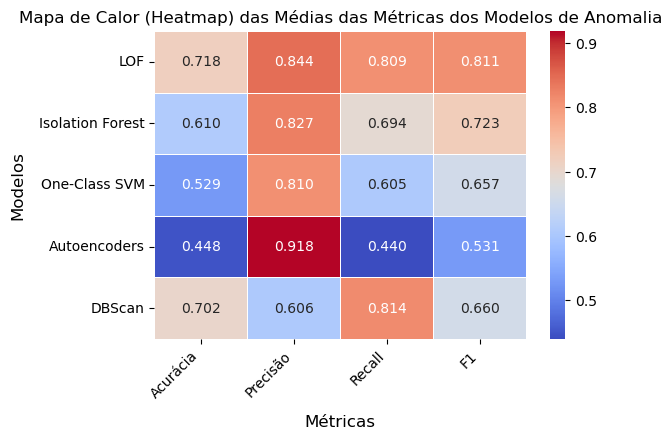

In [41]:
# Dados fornecidos
dados = {
    'Modelo': ['LOF', 'Isolation Forest', 'One-Class SVM', 'Autoencoders', 'DBScan'],
    'Acurácia': [accuracy_scores_heatmap[0], accuracy_scores_heatmap[1], accuracy_scores_heatmap[2], accuracy_scores_heatmap[3], accuracy_scores_heatmap[4]],
    'Precisão': [precision_scores_heatmap[0], precision_scores_heatmap[1], precision_scores_heatmap[2], precision_scores_heatmap[3], precision_scores_heatmap[4]],
    'Recall': [recall_scores_heatmap[0], recall_scores_heatmap[1], recall_scores_heatmap[2], recall_scores_heatmap[3], recall_scores_heatmap[4]],
    'F1': [f1_scores_heatmap[0], f1_scores_heatmap[1], f1_scores_heatmap[2], f1_scores_heatmap[3], f1_scores_heatmap[4]]
}

# Crie um DataFrame com os dados
df = pd.DataFrame(dados)

# Reorganize os dados para criar o heatmap
heatmap_data = df.set_index('Modelo')

# Crie o mapa de calor usando o Seaborn
plt.figure(figsize=(6, 4))
heatmap = sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=.5, fmt=".3f")

# Defina a legenda no lado inferior
heatmap.set_xlabel("Métricas", labelpad=10, fontsize=12)
heatmap.set_ylabel("Modelos", labelpad=10, fontsize=12)


# Defina as etiquetas das colunas (rótulos horizontais)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Mapa de Calor (Heatmap) das Médias das Métricas dos Modelos de Anomalia')
plt.show()
